In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.shape

(2938, 22)

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
COLS =['Life expectancy', 'Adult Mortality','Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

df[COLS]= df[COLS].fillna(df[COLS].mean())

In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Text(0.5, 1.0, 'Histogram of Life Expectancy')

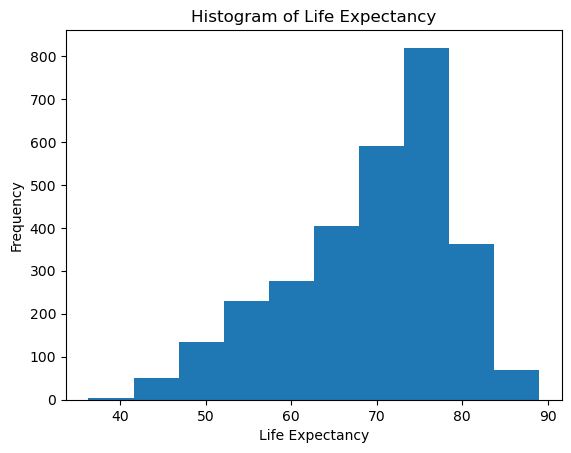

In [12]:
LE = df['Life expectancy']
plt.hist(LE)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')

In [13]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

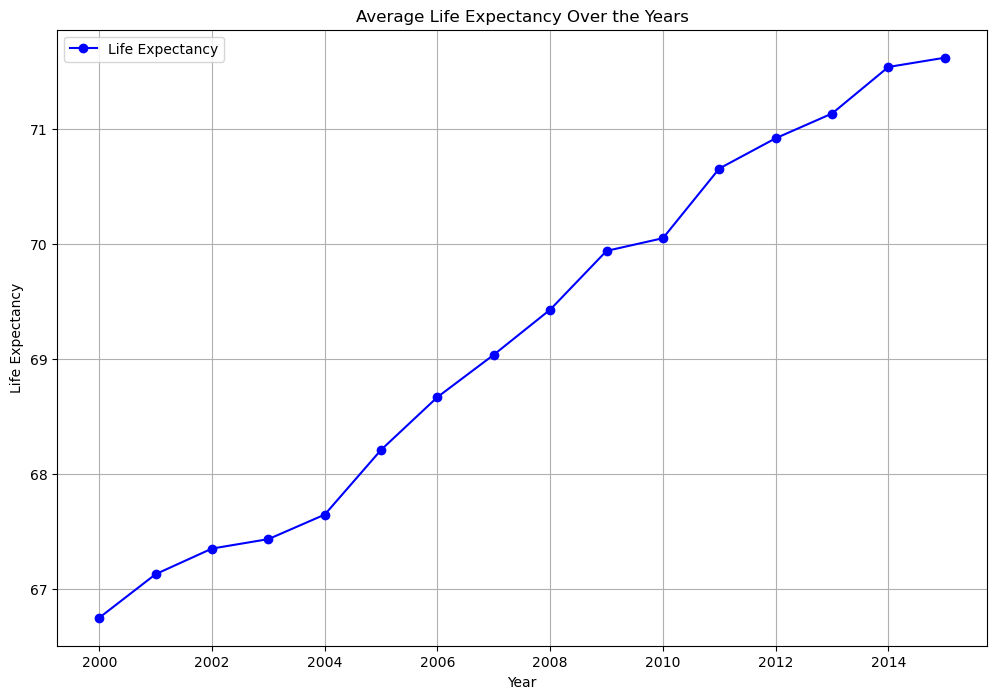

In [14]:
longitudinal_data = df.groupby('Year')['Life expectancy'].mean()

plt.figure(figsize=(12, 8))

plt.plot(longitudinal_data.index, longitudinal_data.values, marker='o', linestyle='-', color='b', label='Life Expectancy')

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Average Life Expectancy Over the Years')
plt.legend()
plt.grid(True)


In [15]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [16]:
df['Country'].nunique()

193

In [17]:
aveg_gender = df.groupby('Status')['Life expectancy'].mean()
aveg_gender

Status
Developed     79.197852
Developing    67.120177
Name: Life expectancy, dtype: float64

Text(0.5, 1.0, 'Average Life Expectancy by Status')

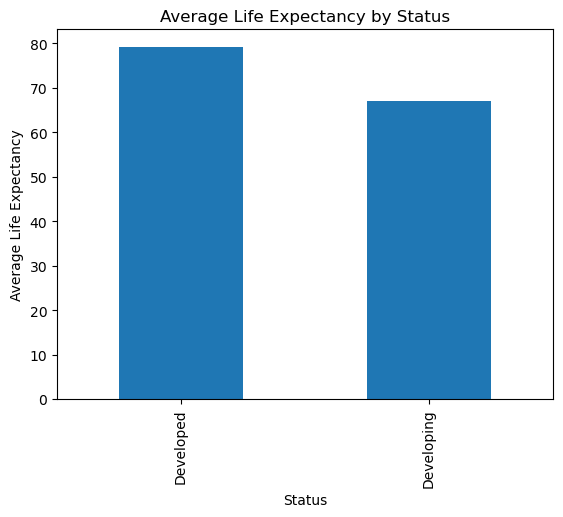

In [18]:
aveg_gender.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Status')

In [19]:
grouped_data = df.groupby('Status').agg({'Country': 'count', 'Life expectancy': 'mean'}).reset_index()
grouped_data

,Status,Country,Life expectancy
0,Developed,512,79.197852
1,Developing,2426,67.120177


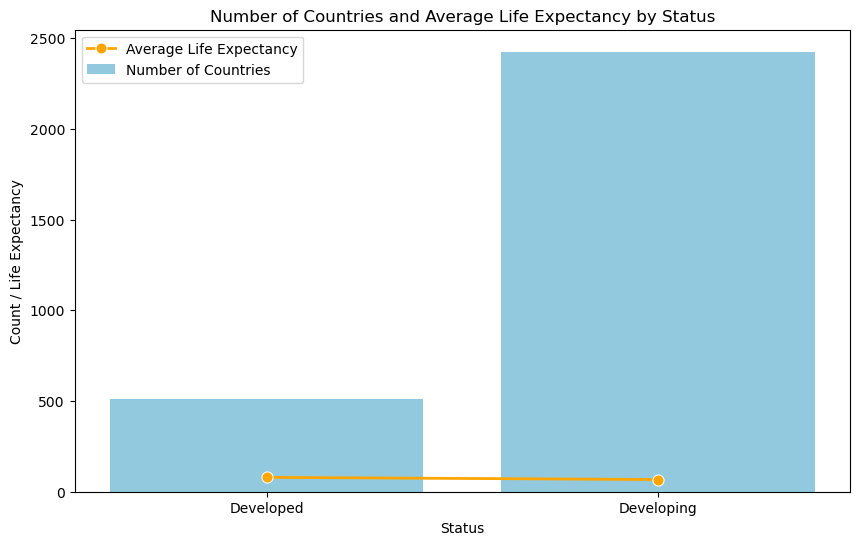

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Country', data=grouped_data, color='skyblue', label='Number of Countries')
sns.lineplot(x='Status', y='Life expectancy', data=grouped_data, marker='o', color='orange', linewidth=2, markersize=8, label='Average Life Expectancy')
plt.xlabel('Status')
plt.ylabel('Count / Life Expectancy')
plt.title('Number of Countries and Average Life Expectancy by Status')
plt.legend()

In [21]:
avg = df.groupby('Country')['Life expectancy'].mean()

avgH = avg.nlargest(10)

print("Top 10 countries with highest average life expectancy:")
avgH

Top 10 countries with highest average life expectancy:


Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life expectancy, dtype: float64

In [22]:
avg = df.groupby('Country')['Life expectancy'].mean()

avgH = avg.nlargest(10).index

top_countries_data = df[df['Country'].isin(avgH)][['Country', 'Status']].drop_duplicates()

print("Top 10 Countries with Highest Average Life Expectancy and Status:")
top_countries_data

Top 10 Countries with Highest Average Life Expectancy and Status:


,Country,Status
112,Australia,Developed
496,Canada,Developing
930,France,Developing
1170,Iceland,Developed
1282,Italy,Developed
1314,Japan,Developed
1910,Norway,Developed
2425,Spain,Developed
2505,Sweden,Developed
2521,Switzerland,Developed


In [23]:
selected_countries = ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France', 'Italy', 'Spain', 'Australia', 'Norway', 'Canada' ]


In [24]:
plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

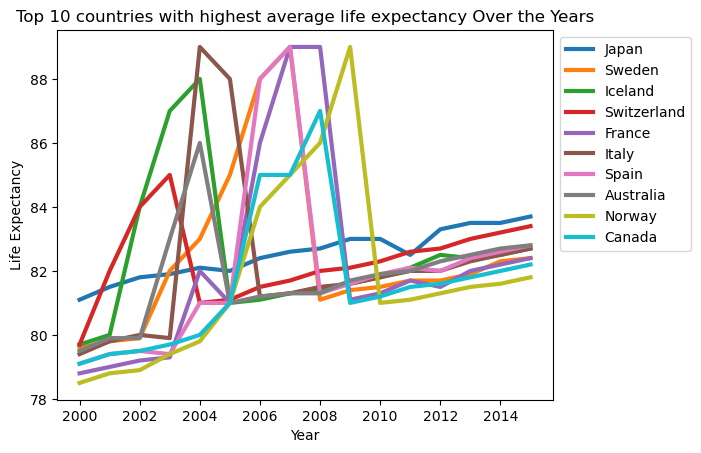

In [27]:
for country in selected_countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'], label=country, linewidth=3)
    
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Top 10 countries with highest average life expectancy Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

,GDP,Life expectancy
Country,,
Japan,24892.544784,82.53750
Sweden,29334.990639,82.51875
Iceland,30159.502907,82.44375
Switzerland,57362.874601,82.33125
France,26465.551381,82.21875
Italy,21234.782371,82.18750
Spain,17093.459737,82.06875
Australia,34637.565047,81.81250
Norway,27434.946928,81.79375


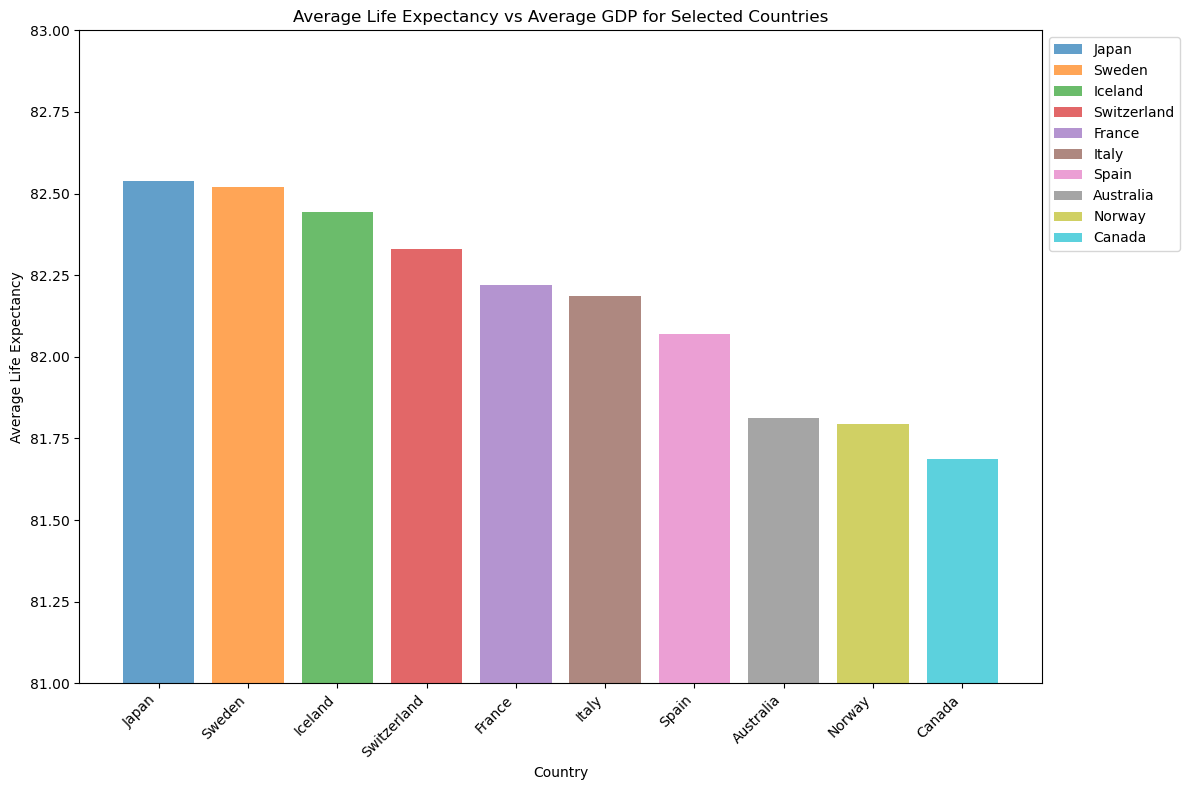

In [29]:
selected_countries =  ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France', 'Italy', 'Spain', 'Australia', 'Norway', 'Canada' ]

selected_data = df[df['Country'].isin(selected_countries)]

average_gdp = selected_data.groupby('Country')['GDP'].mean().reset_index()

sorted_data = selected_data[['Country', 'GDP', 'Life expectancy']].groupby('Country').mean().sort_values(by='Life expectancy', ascending=False)

plt.figure(figsize=(12, 8))

for country in sorted_data.index:
    country_average_gdp = average_gdp[average_gdp['Country'] == country]['GDP'].values[0]
    country_data = selected_data[selected_data['Country'] == country]
    plt.bar(country,
            country_data['Life expectancy'].mean(),
            label=country, alpha=0.7)
    
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Average GDP for Selected Countries')
plt.xticks(rotation=45, ha='right')

plt.ylim(81, 83)  # Set y-axis limits
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

sorted_data


In [30]:
avg = df.groupby('Country')['Life expectancy'].mean()

avgL = avg.nsmallest(10)

print("Top 10 countries with lowest average life expectancy:")
avgL

Top 10 countries with lowest average life expectancy:


Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life expectancy, dtype: float64

In [31]:
avg = df.groupby('Country')['Life expectancy'].mean()

avgL = avg.nsmallest(10).index

top_countries_data = df[df['Country'].isin(avgL)][['Country', 'Status']].drop_duplicates()

print("Top 10 Countries with Lowest Average Life Expectancy and Status:")

top_countries_data

Top 10 Countries with Lowest Average Life Expectancy and Status:


,Country,Status
48,Angola,Developing
432,Côte d'Ivoire,Developing
512,Central African Republic,Developing
528,Chad,Developing
1474,Lesotho,Developing
1570,Malawi,Developing
1893,Nigeria,Developing
2297,Sierra Leone,Developing
2489,Swaziland,Developing
2922,Zimbabwe,Developing


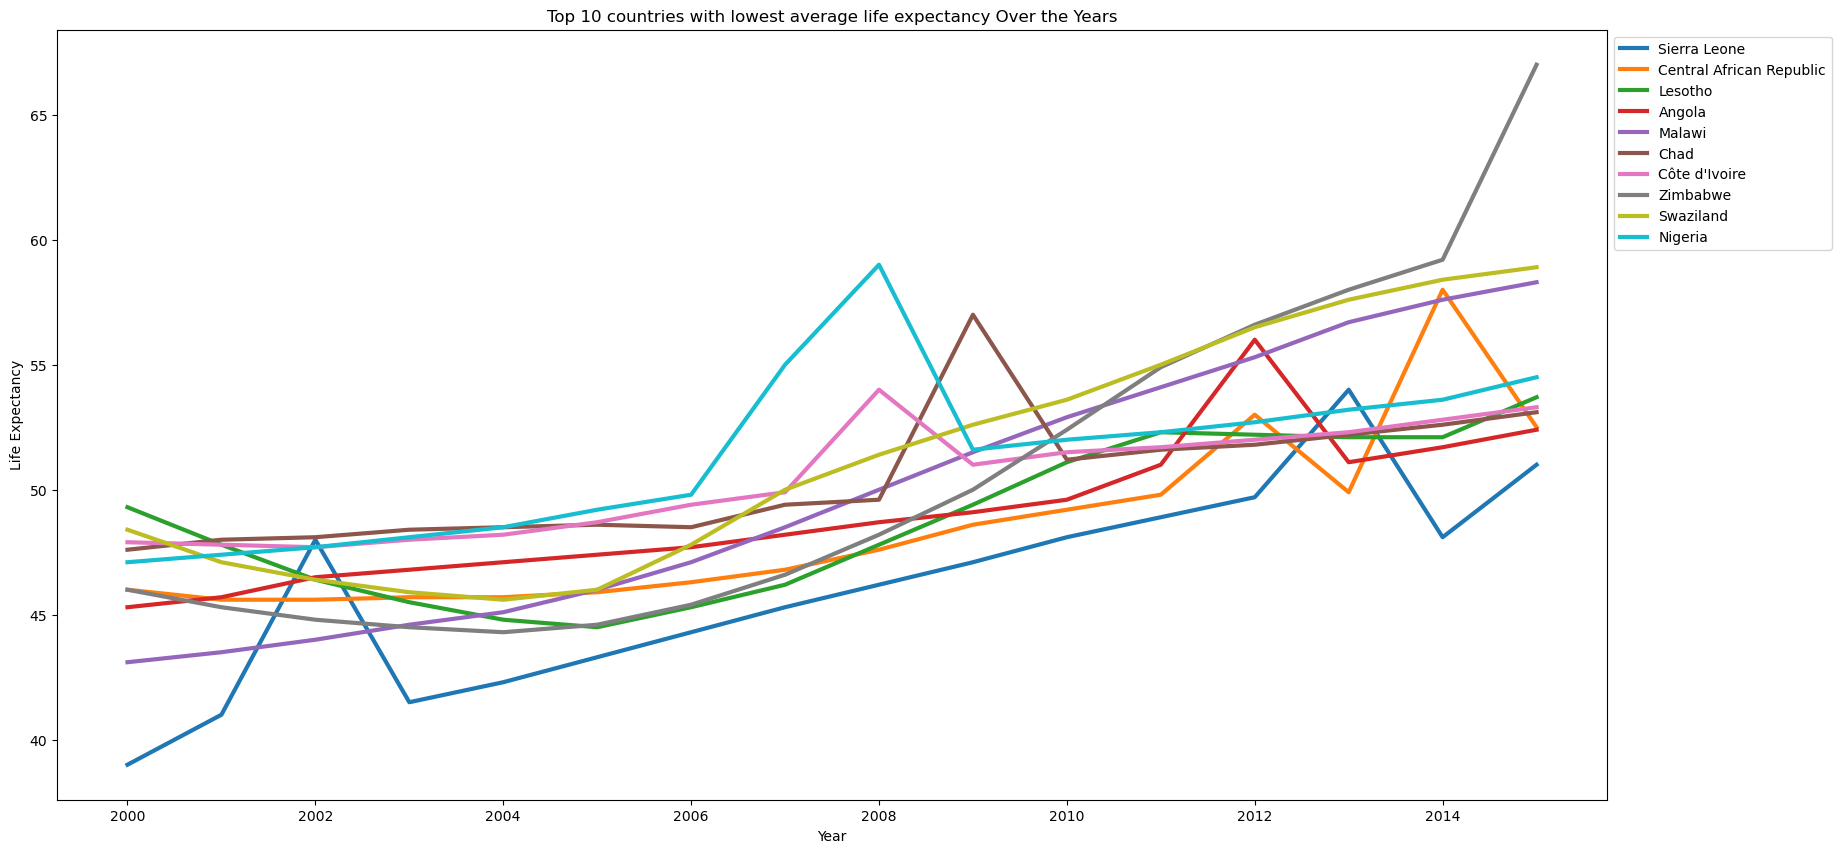

In [32]:
selected_countries = ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi', 'Chad', "Côte d'Ivoire", 'Zimbabwe', 'Swaziland', 'Nigeria']

plt.figure(figsize=(20, 10))

for country in selected_countries:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'], label=country, linewidth=3)
    
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Top 10 countries with lowest average life expectancy Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

,GDP,Life expectancy
Country,,
Nigeria,1360.139877,51.35625
Swaziland,2165.090837,51.32500
Zimbabwe,410.980194,50.48750
Chad,484.791694,50.38750
Côte d'Ivoire,7483.158469,50.38750
Malawi,237.504042,49.89375
Angola,1975.143045,49.01875
Lesotho,794.523010,48.78125
Central African Republic,363.055905,48.51250


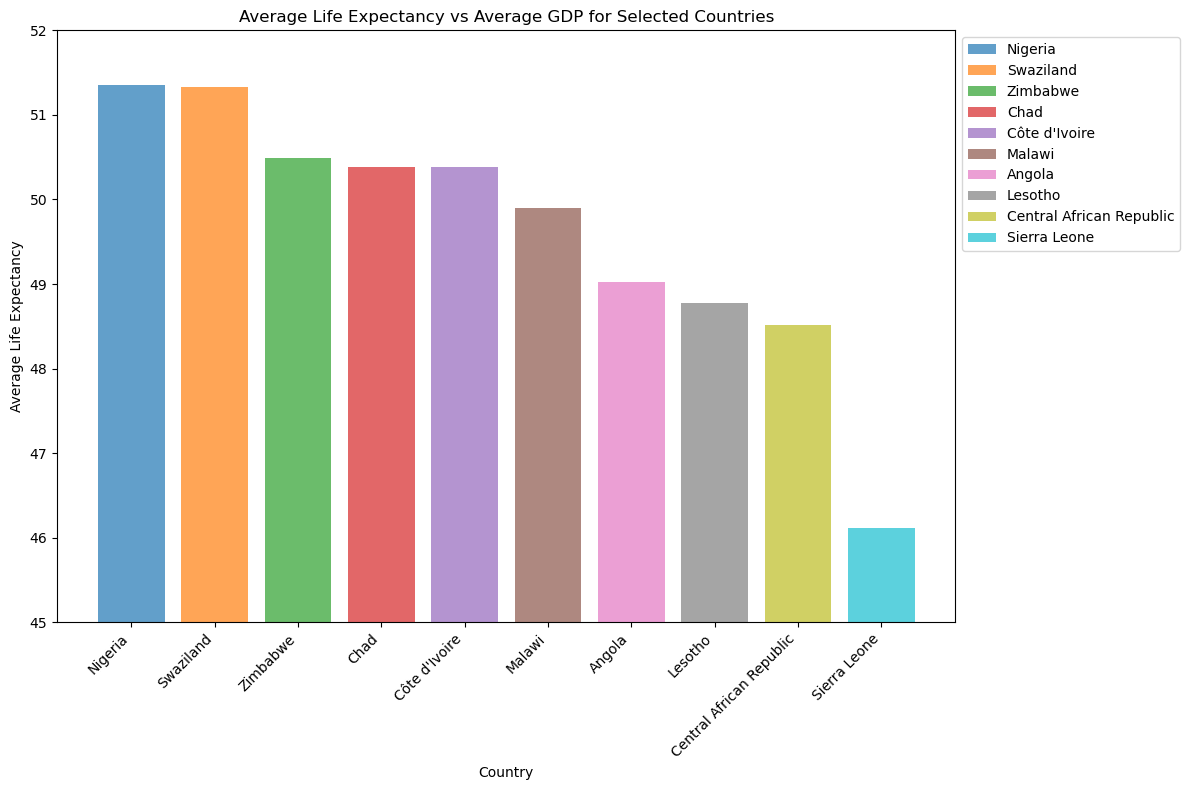

In [33]:
selected_countries =  ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi', 'Chad', "Côte d'Ivoire", 'Zimbabwe', 'Swaziland', 'Nigeria']

selected_data = df[df['Country'].isin(selected_countries)]

average_gdp = selected_data.groupby('Country')['GDP'].mean().reset_index()

sorted_data = selected_data[['Country', 'GDP', 'Life expectancy']].groupby('Country').mean().sort_values(by='Life expectancy', ascending=False)

plt.figure(figsize=(12, 8))

for country in sorted_data.index:
    country_average_gdp = average_gdp[average_gdp['Country'] == country]['GDP'].values[0]
    country_data = selected_data[selected_data['Country'] == country]
    plt.bar(country,
            country_data['Life expectancy'].mean(),
            label=country, alpha=0.7)

plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy vs Average GDP for Selected Countries')
plt.xticks(rotation=45, ha='right')

plt.ylim(45, 52)  # Set y-axis limits
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

sorted_data

Text(0.5, 1.0, 'Correlation Heatmap')

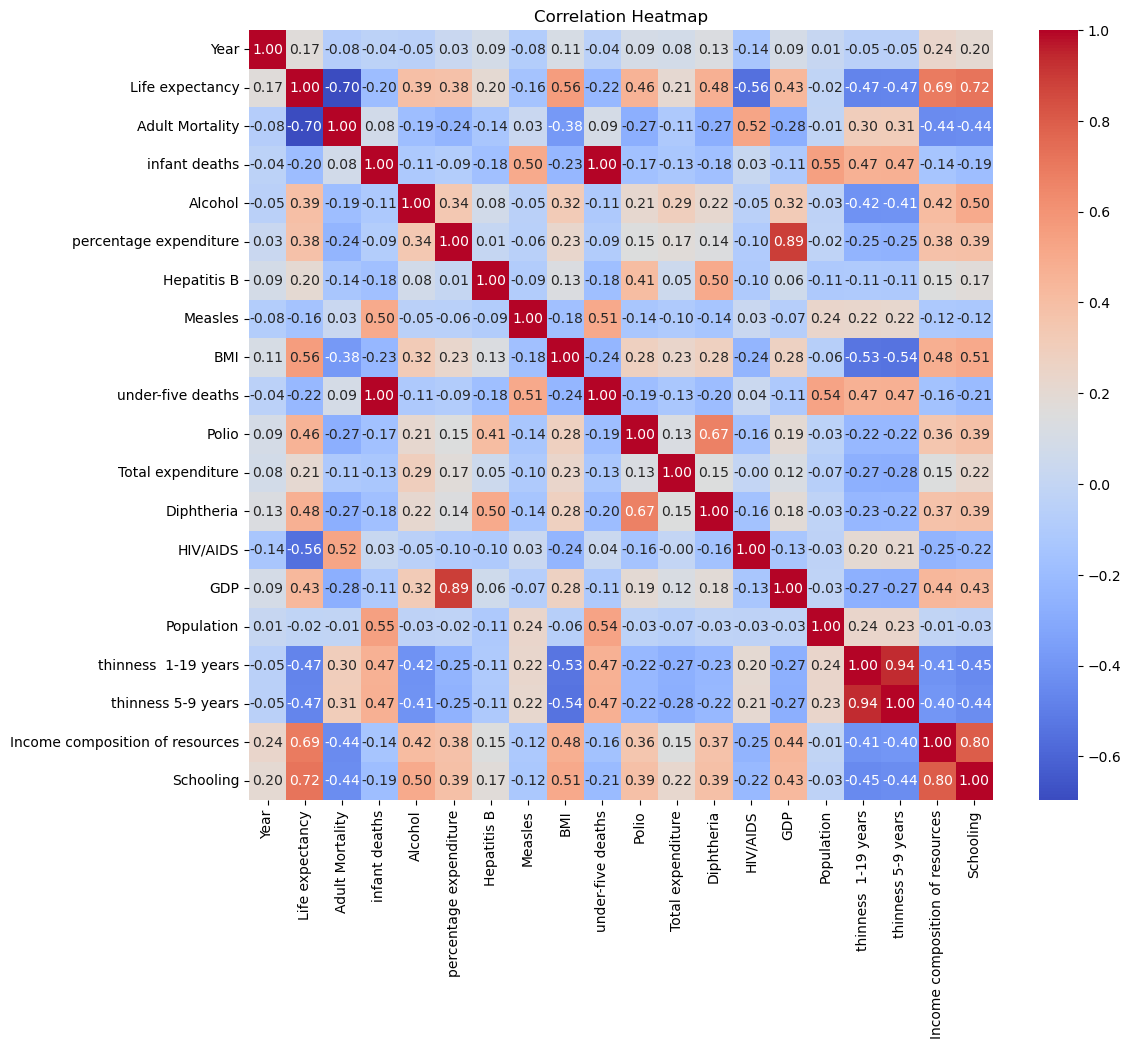

In [34]:
correlation_matrix = df.corr(numeric_only= True)

#create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

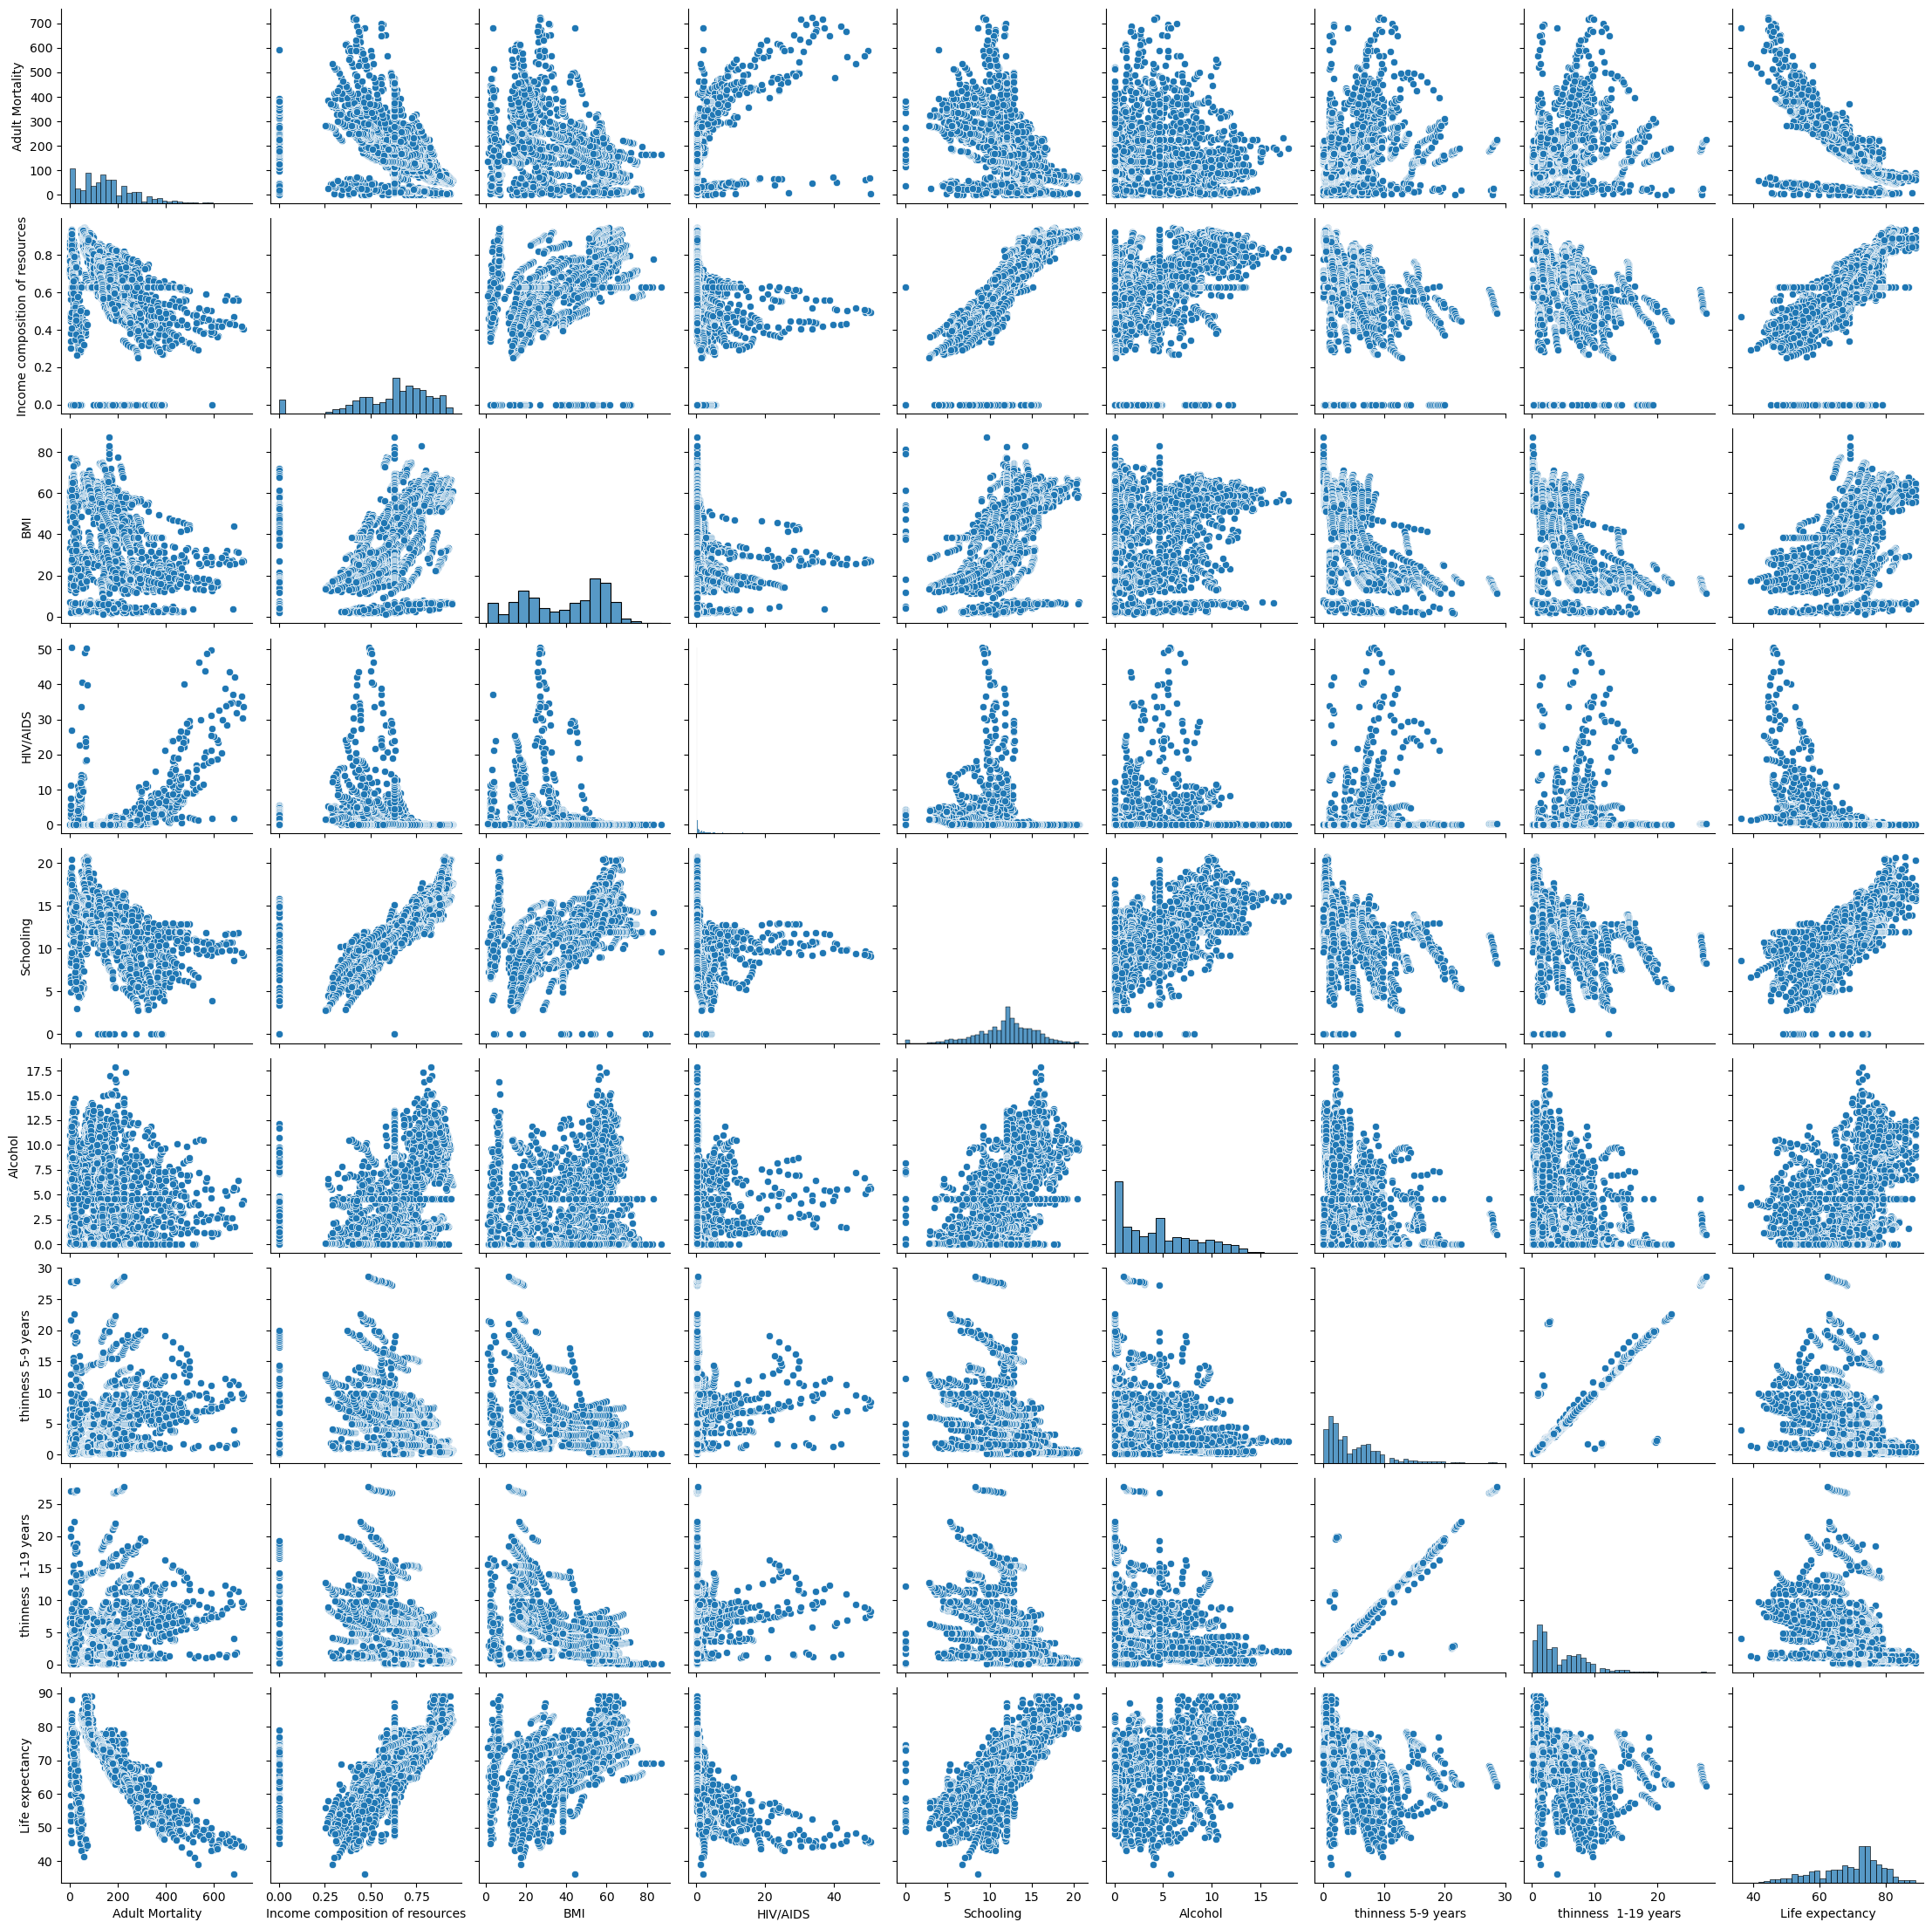

In [35]:
sns.pairplot(df[['Adult Mortality', 'Income composition of resources','BMI','HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years', 'Life expectancy']])
plt.show()

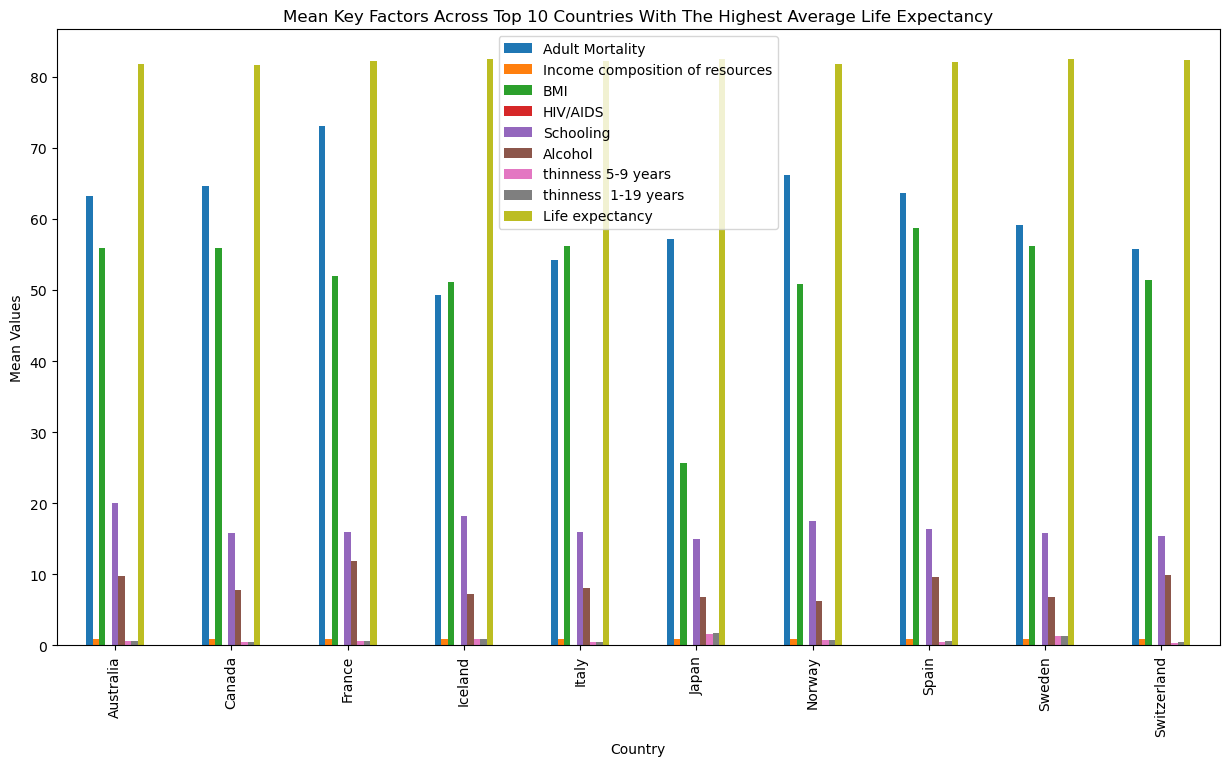

In [36]:
selected_countries = ['Japan', 'Sweden', 'Iceland', 'Switzerland', 'France', 'Italy', 'Spain', 'Australia', 'Norway', 'Canada' ]


key_factors = ['Adult Mortality', 'Income composition of resources', 'BMI', 'HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years', 'Life expectancy']


selected_data = df[df['Country'].isin(selected_countries)]

mean_factors = selected_data.groupby('Country')[key_factors].mean()

mean_factors.plot(kind='bar', figsize=(15, 8))
plt.title('Mean Key Factors Across Top 10 Countries With The Highest Average Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Mean Values')
plt.show()


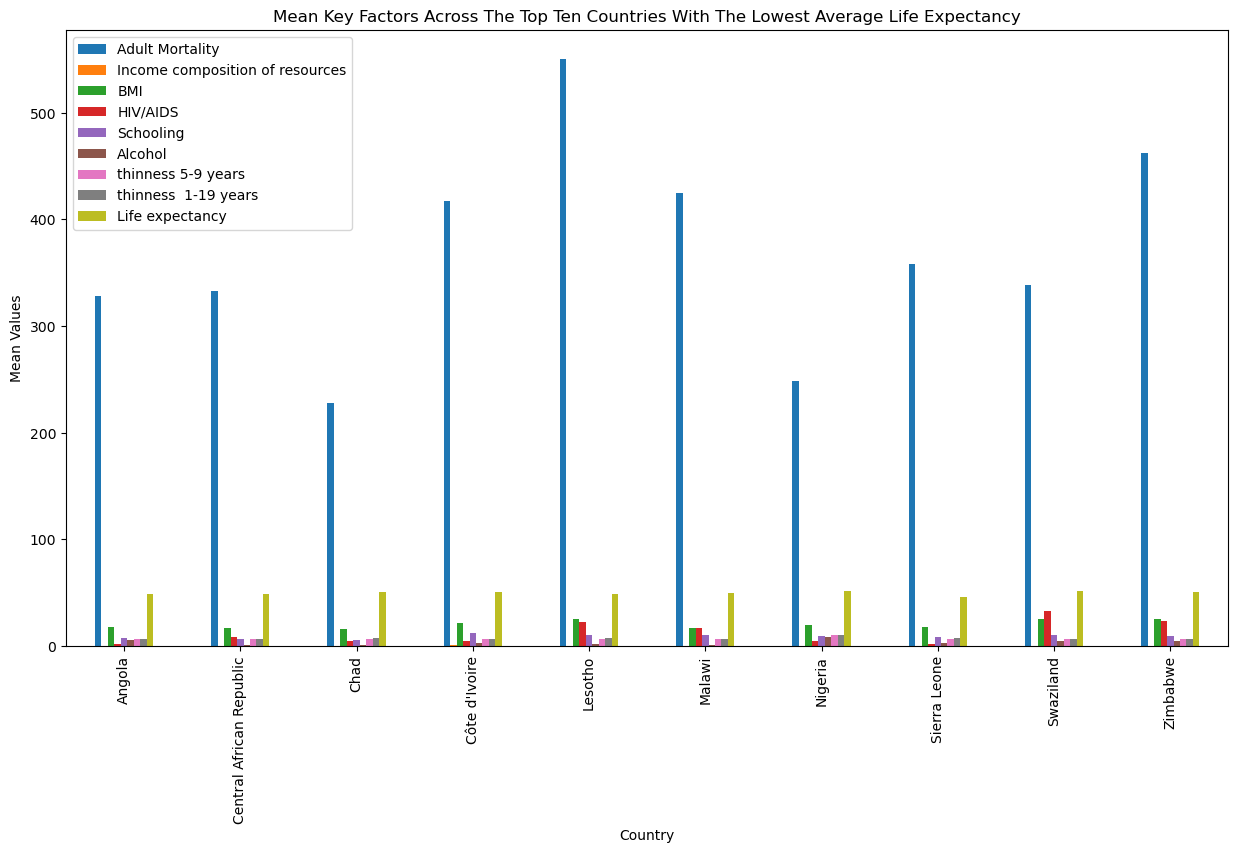

In [37]:
selected_countries = ['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola', 'Malawi', 'Chad', "Côte d'Ivoire", 'Zimbabwe', 'Swaziland', 'Nigeria']


key_factors = ['Adult Mortality', 'Income composition of resources', 'BMI', 'HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years', 'Life expectancy']

selected_data = df[df['Country'].isin(selected_countries)]

mean_factors = selected_data.groupby('Country')[key_factors].mean()

mean_factors.plot(kind='bar', figsize=(15, 8))
plt.title('Mean Key Factors Across The Top Ten Countries With The Lowest Average Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Mean Values')
plt.show()

In [38]:
X = df[['Adult Mortality', 'Income composition of resources','BMI','HIV/AIDS', 'Schooling', 'Alcohol', 'thinness 5-9 years', 'thinness  1-19 years' ]]

y=df[['Life expectancy']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [40]:
print(X_train.shape)

(2203, 8)


In [41]:
print(X_test.shape)

(735, 8)


In [42]:
print(y_train.shape)

(2203, 1)


In [43]:
print(y_test.shape)

(735, 1)


In [44]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()


regr.fit(X_train,y_train)

LinearRegression()

In [45]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[-0.02343498  8.5341675   0.05231046 -0.46270783  0.79630095  0.13857458
   0.03395369 -0.12852739]]
Intercept: [56.86322908]


In [46]:
y_prediction =  regr.predict(X_test)
y_prediction

array([[69.8171029 ],
       [78.45396353],
       [71.32078282],
       [76.27206508],
       [62.59340509],
       [76.33965616],
       [56.33264892],
       [62.88229791],
       [66.91168299],
       [78.70307428],
       [75.18001885],
       [68.56729943],
       [75.20802849],
       [71.16043837],
       [72.96212151],
       [82.47997071],
       [78.19970316],
       [78.55408983],
       [75.58802948],
       [75.6864338 ],
       [66.33966852],
       [78.21629277],
       [77.14496085],
       [80.80854987],
       [43.28280159],
       [57.99300516],
       [60.88884443],
       [72.39879657],
       [68.64532734],
       [74.00729091],
       [78.28474469],
       [74.27953944],
       [84.06318816],
       [69.1731977 ],
       [70.04406772],
       [71.28044741],
       [71.80391512],
       [73.56939914],
       [80.54311335],
       [70.28625214],
       [71.92900822],
       [79.77813168],
       [74.86290929],
       [71.22781993],
       [59.10009389],
       [56

In [47]:
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Mean absolute error: %.2f" % mae)
print("Residual sum of squares (MSE): %.2f" % mse)
print("R2-score: %.2f" % r2)

Mean absolute error: 3.19
Residual sum of squares (MSE): 19.21
R2-score: 0.78


In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [50]:
tree = DecisionTreeRegressor(random_state=0)

tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred = tree.predict(X_test)

print("--- max_depth = None ---")
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("R2-score: %.2f" % r2_score(y_test,y_pred))

--- max_depth = None ---
Mean squared error (MSE): 6.17
R2-score: 0.92


In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
X[0:5]

,Adult Mortality,Income composition of resources,BMI,HIV/AIDS,Schooling,Alcohol,thinness 5-9 years,thinness 1-19 years
0,263.0,0.479,19.1,0.1,10.1,0.01,17.3,17.2
1,271.0,0.476,18.6,0.1,10.0,0.01,17.5,17.5
2,268.0,0.470,18.1,0.1,9.9,0.01,17.7,17.7
3,272.0,0.463,17.6,0.1,9.8,0.01,18.0,17.9
4,275.0,0.454,17.2,0.1,9.5,0.01,18.2,18.2


In [54]:
y[0:5]


,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2203, 8) (2203, 1)
Test set: (735, 8) (735, 1)


In [56]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):

    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.r2_score(y_test, yhat)

print(mean_acc)

[0.92191774 0.92934955 0.92854439 0.93091816 0.93017552 0.92612656
 0.92543522 0.92279626 0.92083423]


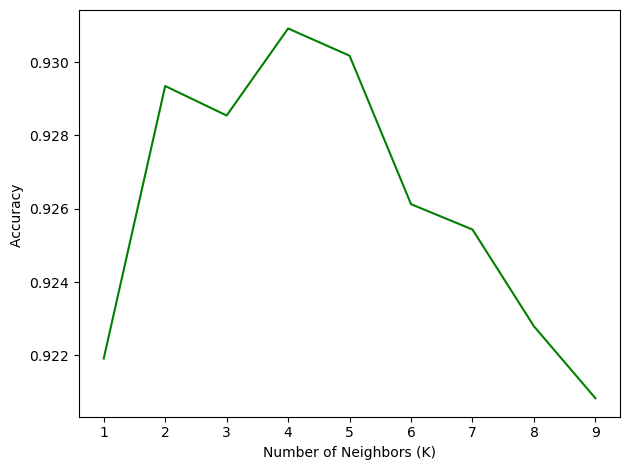

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


r2 = r2_score(y_test, y_pred)


print("R2 Score:", r2)

Mean Squared Error: 4.765305921098684
R2 Score: 0.9449957789574405


In [59]:
from sklearn.cluster import KMeans

In [60]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum)
k_means.fit(X)
labels = k_means.labels_
print(labels)

C:\Users\chintan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 1 0 0]


In [61]:
df["Clust"] = labels
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Clust
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,3
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,3
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,3
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,3


In [62]:
df.groupby('Clust').mean(numeric_only=True)


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Clust,,,,,,,,,,,,,,,,,,,,
0,2005.575342,50.291096,501.212329,36.623288,3.706752,122.581090,73.839852,3675.712329,22.128082,55.917808,69.993151,6.254633,70.595890,16.144521,2325.072958,7.846946e+06,7.732192,7.850000,0.473788,10.051068
1,2007.677903,74.285581,50.078652,21.815543,5.769820,1694.703544,82.664133,2702.445693,44.856781,30.071161,86.990216,6.398565,86.806483,1.084176,14228.779496,1.206946e+07,3.493895,3.412585,0.723087,13.549227
2,2007.551426,71.721132,162.882424,30.299914,4.443619,253.133486,83.548914,1470.337079,41.107593,38.735523,86.786777,5.765966,86.637809,0.224806,4366.016118,1.504742e+07,4.494001,4.683994,0.643151,12.254955
3,2007.652557,59.474427,298.158730,44.673721,2.960466,85.126347,74.199417,3500.380952,24.494876,67.731922,68.775313,5.340979,68.098570,2.368959,2466.034885,1.062383e+07,7.335294,7.229046,0.455362,9.026123


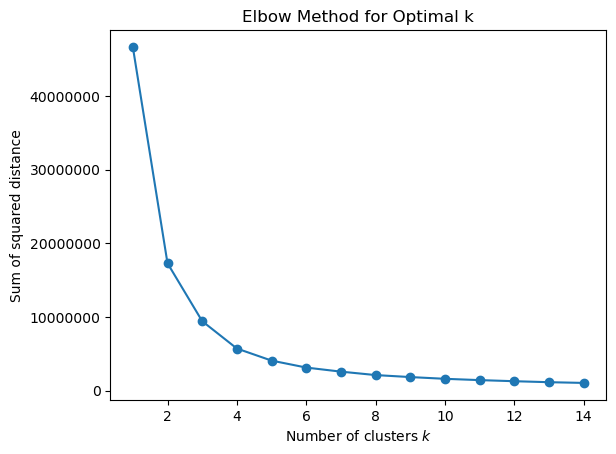

In [63]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.figure()
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')


plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [64]:
num_clusters = 3

In [65]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [66]:
kmeans.fit(X)

C:\Users\chintan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [67]:
df['Cluster'] = kmeans.labels_

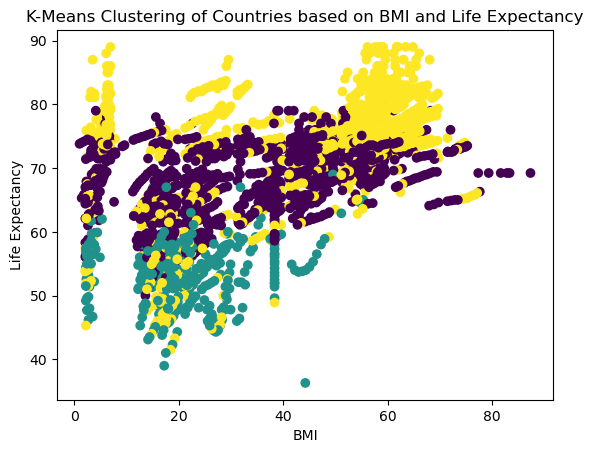

In [68]:
plt.scatter(df['BMI'], df['Life expectancy'], c=df['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('K-Means Clustering of Countries based on BMI and Life Expectancy')
plt.show()

In [69]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
   Adult Mortality  Income composition of resources        BMI  HIV/AIDS  \
0       197.613819                         0.586176  35.919816  0.543154   
1       412.130556                         0.448079  21.384496  8.966667   
2        61.742567                         0.720194  45.534932  0.926604   

   Schooling   Alcohol  thinness 5-9 years  thinness  1-19 years  
0  11.316443  3.814064            5.649073              5.510365  
1   9.054357  3.667092            7.391819              7.373599  
2  13.508514  5.668833            3.367872              3.443724  


In [70]:
print("Count of Countries in Each Cluster:")
print(df['Cluster'].value_counts())

Count of Countries in Each Cluster:
0    1300
2    1278
1     360
Name: Cluster, dtype: int64


In [71]:
from sklearn.metrics import silhouette_score

In [72]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5144856291435533


In [73]:
from sklearn.svm import SVR


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVR(kernel='linear')

svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


mse = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R2 Score:", r2_score)

C:\Users\chintan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 20.85914231409813
R2 Score: 0.759230384449624


In [74]:
#thank you